In [6]:
import netCDF4
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

In [6]:
def printdetails(filename):
    nc = netCDF4.Dataset(filename)
    print(f"Keys : {nc.variables.keys()}")
    wind_speed = nc.variables['wind_speed_AW']
    print(f"Wind speed unit : {wind_speed.units}\nLong Name : {wind_speed.long_name}\nWind speed shape : {wind_speed.shape}\nWind speed dimensions : {wind_speed.dimensions}")
    
    lons = np.array(nc['lon']).squeeze()
    lats = np.array(nc['lat']).squeeze()
    ws = np.array(nc['wind_speed_AW']).squeeze()

    print(f"Total number of values : {ws.shape[0] * ws.shape[1]}")
    print(f"Number of null values : {np.count_nonzero(np.isnan(ws))}")
    
    lon_0 = lons.mean()
    lat_0 = lats.mean()
    
    print(f"Mean latitude : {lat_0}")
    print(f"Mean longitude : {lon_0}")

    print()
    print("Rest of the metadata")
    print(nc)

In [7]:
printdetails("./Data/01-jul-1.nc")

Keys : dict_keys(['lon', 'lat', 'time', 'time_bnds', 'wind_speed_AW'])
Wind speed unit : m s-1
Long Name : AMSR2 All Weather (AW) wind speed
Wind speed shape : (1, 720, 1440)
Wind speed dimensions : ('time', 'lat', 'lon')
Total number of values : 1036800
Number of null values : 0
Mean latitude : 0.0
Mean longitude : 180.0

Rest of the metadata
<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    history: PyFerret V7.65 (optimized) 11-Nov-23
    Conventions: CF-1.6
    CDI: Climate Data Interface version 2.1.0 (https://mpimet.mpg.de/cdi)
    source: RSS AMSR2 V8.2 AS-ECV Algorithms
    institution: Remote Sensing Systems, Santa Rosa, CA, USA
    summary: RSS climate quality air-sea products (SST, wind, vapor, cloud, rain), derived from JAXA microwave radiometer AMSR2 aboard JAXA GCOM-W1, produced by Remote Sensing Systems, gridded at .25 degree resolution in time averaged files, carefully intercallibrated with other microwave radiometers a

In [7]:
def givedate(filename):
    a = filename.split("-")
    month = a[1]
    day = a[2][:-3]
    return f"{day} {month}"

In [76]:
def plot(filename, step = 4):
    nc = netCDF4.Dataset(filename)
    wind_speed, lon, lat = nc.variables['wind_speed_AW'], nc.variables['lon'], nc.variables['lat']
    ws = wind_speed[0]
    lonvalues, latvalues = np.meshgrid(lon[:], lat[:])

    map = Basemap(projection='mill',lon_0= lon[:].mean())
    x,y = map(lonvalues, latvalues)
    # map.drawlsmask(land_color='white',ocean_color='lightblue',lakes=True)
    map.shadedrelief()
    map.drawparallels(np.arange(-90,90,30),labels=[1,0,0,0])
    map.drawmeridians(np.arange(map.lonmin,map.lonmax+30,60),labels=[0,0,0,1])

    clevs = np.arange(0, ws.max().max(), step)
    cntr = map.contour(x, y, ws, clevs, colors = 'black', linewidths = 0.8)
    plt.title(givedate(filename))
    # cb.set_label(f'Wind Speed {wind_speed.units}')

In [8]:
import os
datafiles = os.listdir('./Data/')
print(datafiles)

['01-jul-1.nc', '02-jul-7.nc', '03-jul-14.nc', '04-jul-21.nc', '05-jul-28.nc', '06-aug-1.nc', '07-aug-7.nc', '08-aug-14.nc', '09-aug-21.nc', '10-aug-28.nc', '11-sept-1.nc', '12-sept-7.nc', '13-sept-14.nc', '14-sept-21.nc', '15-sept-28.nc']


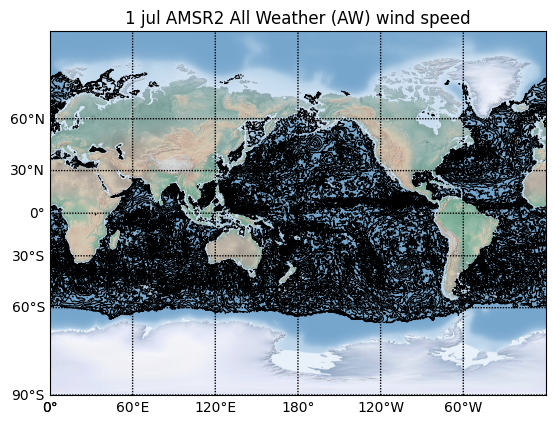

In [72]:
plot(f'./Data/{datafiles[0]}', 1)

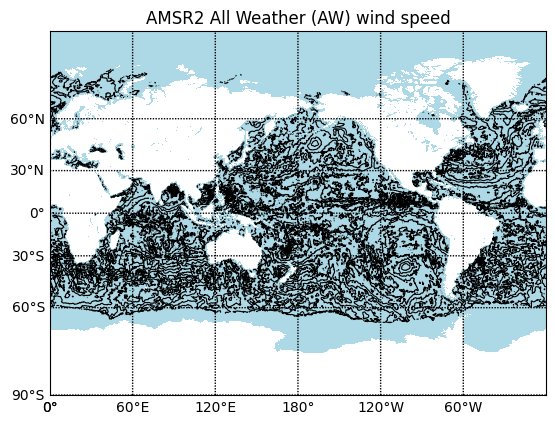

In [49]:
plot(f'./Data/{datafiles[0]}', 2)


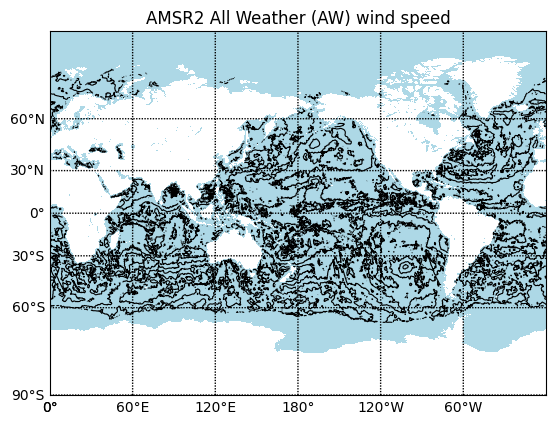

In [50]:
plot(f'./Data/{datafiles[0]}', 3)


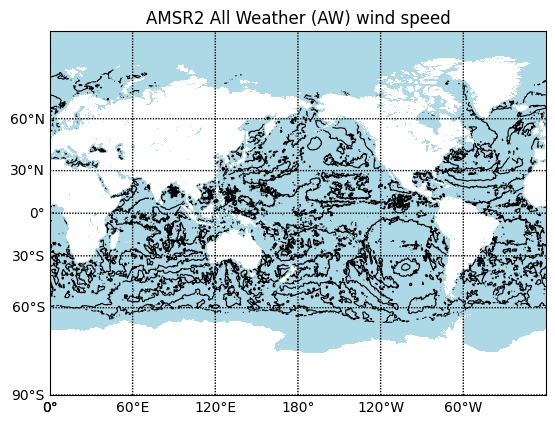

In [59]:
plot(f'./Data/{datafiles[0]}', 4)


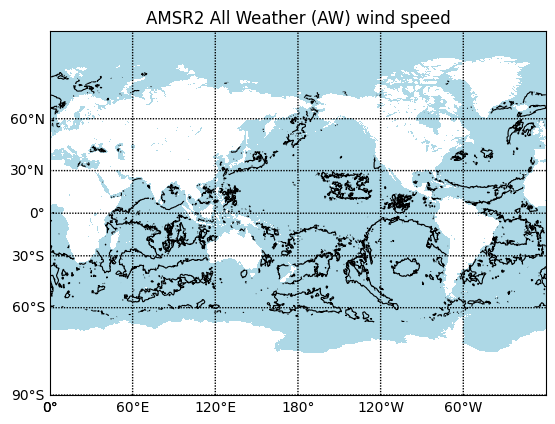

In [52]:
plot(f'./Data/{datafiles[0]}', 8)


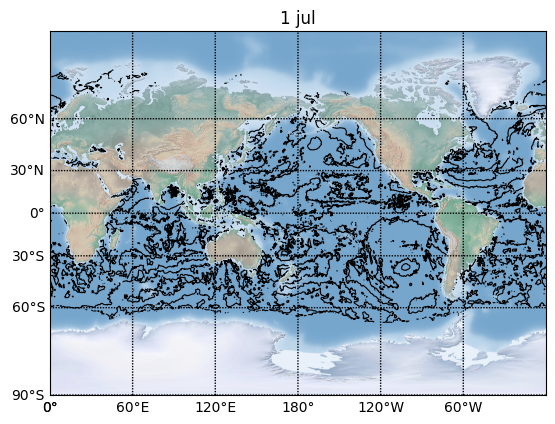

In [77]:
plot(f'./Data/{datafiles[0]}')

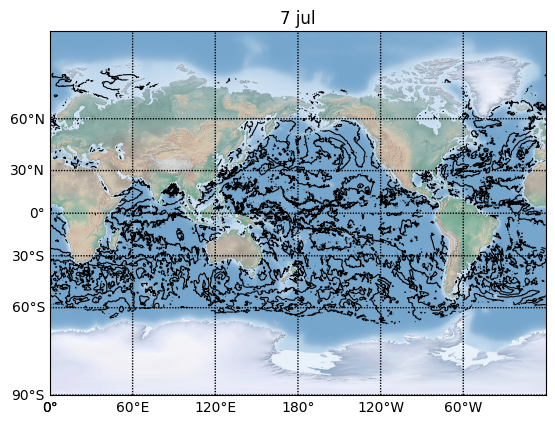

In [78]:
plot(f'./Data/{datafiles[1]}')

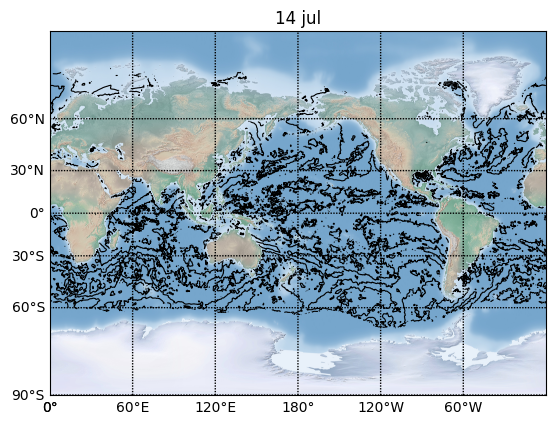

In [79]:
plot(f'./Data/{datafiles[2]}')

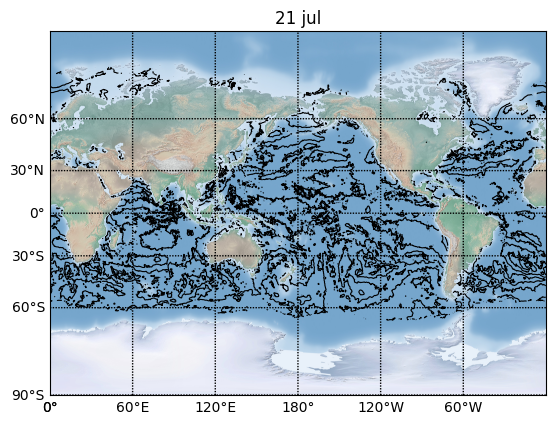

In [80]:
plot(f'./Data/{datafiles[3]}')


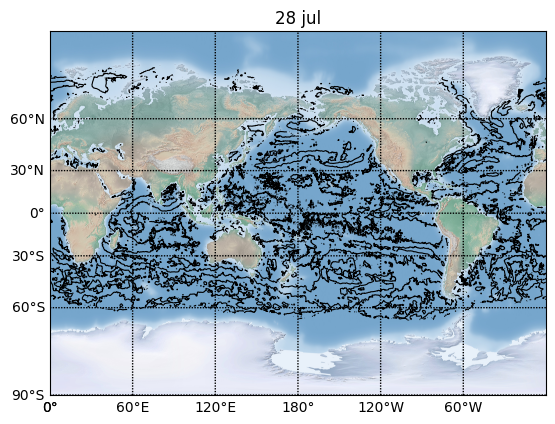

In [81]:
plot(f'./Data/{datafiles[4]}')


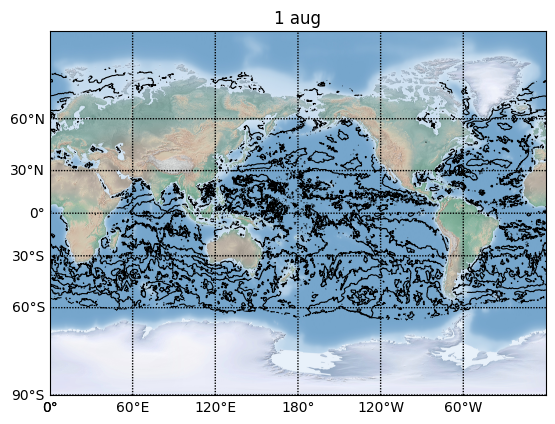

In [82]:
plot(f'./Data/{datafiles[5]}')


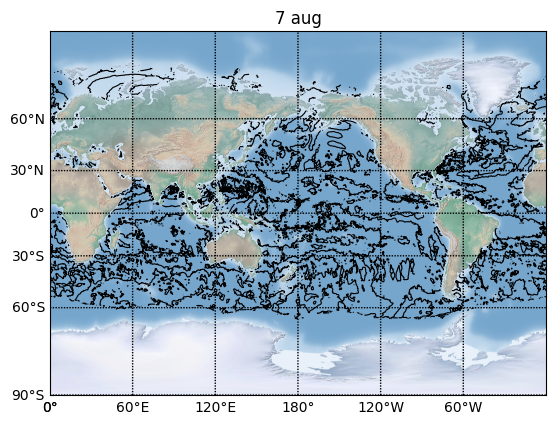

In [83]:
plot(f'./Data/{datafiles[6]}')


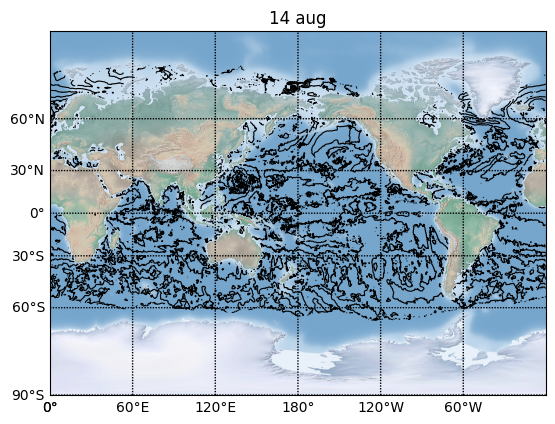

In [84]:
plot(f'./Data/{datafiles[7]}')


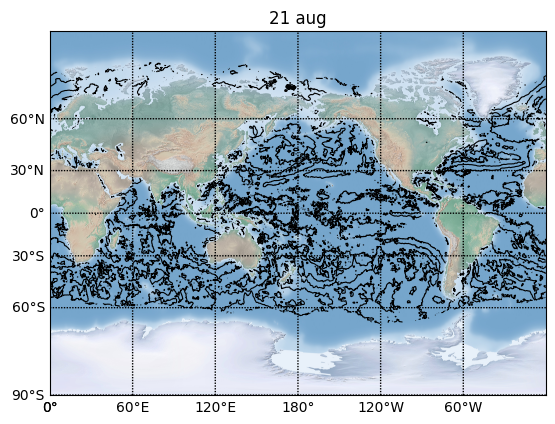

In [85]:
plot(f'./Data/{datafiles[8]}')


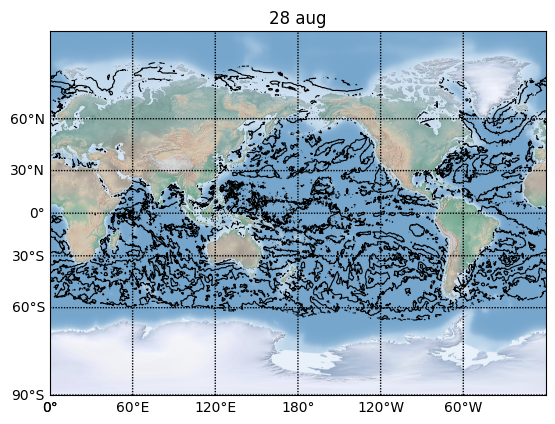

In [88]:
plot(f'./Data/{datafiles[9]}')

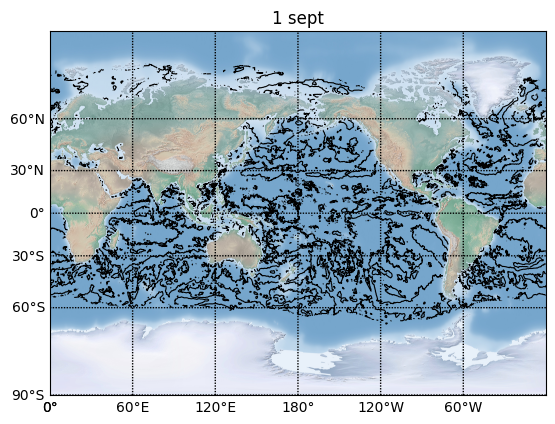

In [87]:
plot(f'./Data/{datafiles[10]}')


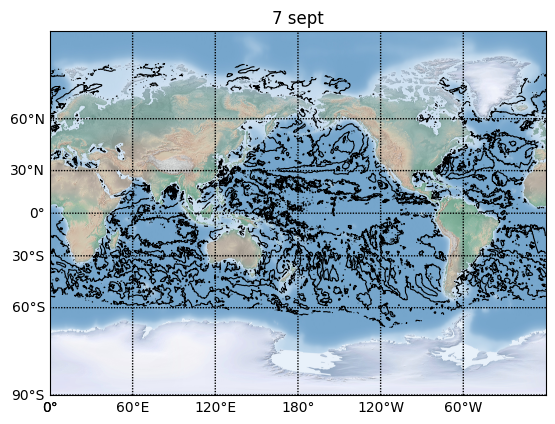

In [89]:
plot(f'./Data/{datafiles[11]}')

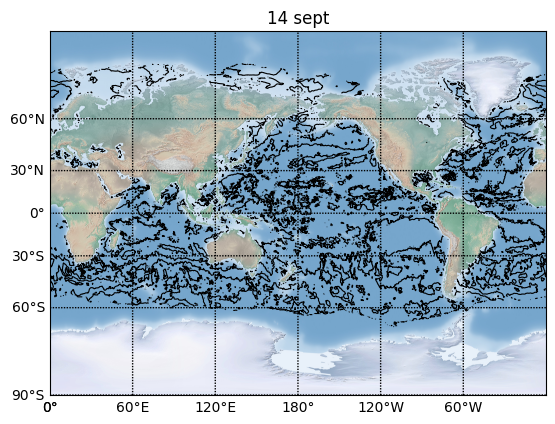

In [90]:
plot(f'./Data/{datafiles[12]}')

In [29]:
def plotcolor(filename):
    nc = netCDF4.Dataset(filename)
    wind_speed, lon, lat = nc.variables['wind_speed_AW'], nc.variables['lon'], nc.variables['lat']
    ws = wind_speed[0]
    lonvalues, latvalues = np.meshgrid(lon[:], lat[:])

    map = Basemap(projection='mill',lon_0= lon[:].mean())
    x,y = map(lonvalues, latvalues)
    map.drawlsmask(land_color='lightgreen',ocean_color='white',lakes=True)
    map.drawparallels(np.arange(-90,90,30),labels=[1,0,0,0])
    map.drawmeridians(np.arange(map.lonmin,map.lonmax+30,60),labels=[0,0,0,1])

    clevs = np.arange(0, 30, 4)
    cntr = map.contour(x, y, ws, clevs, cmap = 'viridis', linewidths = 0.8)
    cb = plt.colorbar()
    plt.title(givedate(filename))
    
    cb.set_label(f'Wind Speed {wind_speed.units}')

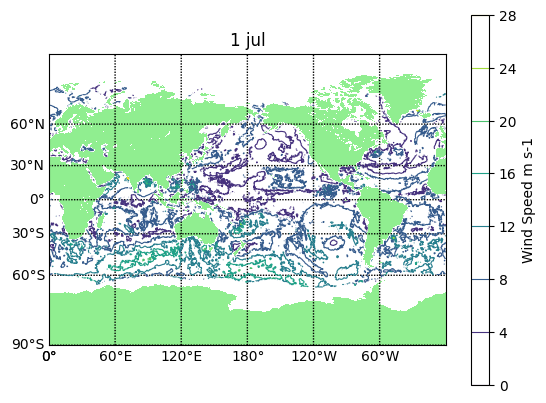

In [30]:
plotcolor(f'./Data/{datafiles[0]}')